In [1]:
import sys
print sys.prefix
print sys.version

c:\anaconda2\envs\mypy
2.7.12 |Continuum Analytics, Inc.| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


## Import custom modules and create the DrillQueries singleton

In [2]:
import aphp_waves_dic as wd
import drill_utilities as du
import drill_queries as dq
import waves_utils as wu
import pandas as pd

drill_q = dq.DrillQueries("drill_eds", ['HR', 'RR', 'ABPS', 'ABPD', 'SPO2'])

In [3]:
q = "select * from nda_j1_deces where HR <20 and RR<20 and SPO2<20 and ABPS<20 and ABPD<20"
df_mes = drill_q.drill_conn.df_from_query(q)
df_mes.head()

,id_nda,j1,HR,RR,ABPS,ABPD,SPO2,dt_deces,dt_min,dt_max,stay_len
0,5717776,2015-04-14,18.0,18.0,18.0,18.0,18.0,NaT,2015-04-14 21:09:22,2015-04-15 00:53:01,0 days 03:43:39
1,7042042,2015-07-09,15.0,16.0,15.0,15.0,15.0,NaT,2015-07-10 07:38:00,2015-07-10 20:00:00,0 days 12:22:00
2,7359931,2015-07-23,16.0,16.0,14.0,14.0,16.0,NaT,2015-07-24 11:04:28,2015-07-24 19:19:10,0 days 08:14:42
3,7518340,2015-08-24,16.0,16.0,19.0,19.0,16.0,2016-03-01 00:00:00,2015-08-24 16:00:00,2015-08-25 14:41:13,0 days 22:41:13
4,7603491,2015-09-06,14.0,18.0,11.0,11.0,19.0,2015-10-08 16:20:00,2015-09-06 13:25:00,2015-09-07 13:00:43,0 days 23:35:43


In [4]:
waves_u = wu.WavesUtilities(['HR', 'RR', 'ABPS', 'ABPD', 'SPO2'], None, "D:/tmp/EDS_TABLES")

## Select all available measures for case of index=4 (upsampling)

In [5]:
select_case_tpl = "select id_nda, CAST(dt_deb as VARCHAR) as j1, \
    CONCAT(CAST(id_nda as VARCHAR), CAST(dt_deb as VARCHAR)) as id_case, \
    id_measure_type, dt_insert, value_numeric \
    from icu_sensor_util \
    where CONCAT(CAST(id_nda as VARCHAR), CAST(dt_deb as VARCHAR))='{}'"

q = select_case_tpl.format('76034912015-09-06')

df_case = drill_q.drill_conn.df_from_query(q)
df_case.head()

,id_nda,j1,id_case,id_measure_type,dt_insert,value_numeric
0,7603491,2015-09-06,76034912015-09-06,4,2015-09-06 23:08:00,35.8
1,7603491,2015-09-06,76034912015-09-06,10524,2015-09-06 23:07:00,NaN
2,7603491,2015-09-06,76034912015-09-06,10523,2015-09-06 23:07:00,2.0
3,7603491,2015-09-06,76034912015-09-06,10176,2015-09-06 23:07:00,NaN
4,7603491,2015-09-06,76034912015-09-06,10121,2015-09-06 23:07:00,NaN


In [6]:
# Separate waves by VOI in a dictionary
waves_dic = waves_u.get_waves_from_pdf(df_case)

In [7]:
# get dates intervals by case
df_ranges = drill_q.get_dt_ranges()
df_ranges.head()

,id_nda,j1,HR,RR,ABPS,ABPD,SPO2,dt_deces,dt_min,dt_max,stay_len
0,2744589,2014-05-08,108.0,107.0,179.0,177.0,107.0,2014-08-04 05:33:00,2014-05-08 00:44:00,2014-05-09 00:21:01,0 days 23:37:01
1,2744589,2014-06-24,108.0,108.0,133.0,133.0,108.0,2014-08-04 05:33:00,2014-06-24 19:13:09,2014-06-25 18:46:02,0 days 23:32:53
2,2754266,2014-05-05,95.0,93.0,95.0,95.0,94.0,NaT,2014-05-05 16:44:01,2014-05-06 16:28:09,0 days 23:44:08
3,2758408,2014-05-12,105.0,104.0,105.0,105.0,100.0,2015-11-17 14:40:00,2014-05-12 19:33:00,2014-05-13 17:38:01,0 days 22:05:01
4,2760623,2014-05-01,68.0,68.0,68.0,68.0,68.0,NaT,2014-05-01 12:50:21,2014-05-02 03:33:10,0 days 14:42:49


## Case with few points - original waves

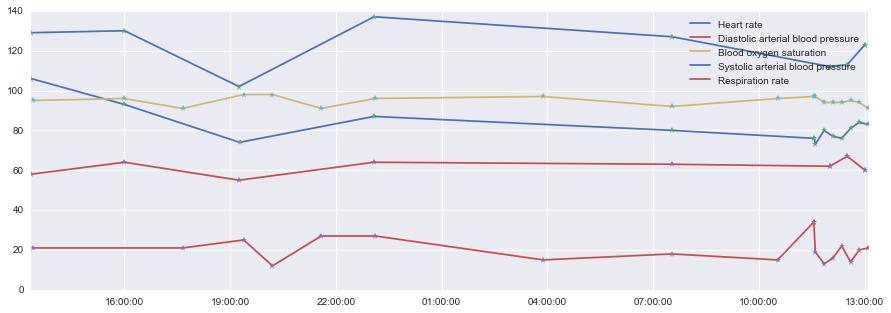

In [8]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
waves_u.plot_waves(waves_dic)

## Case with few points - resampled waves

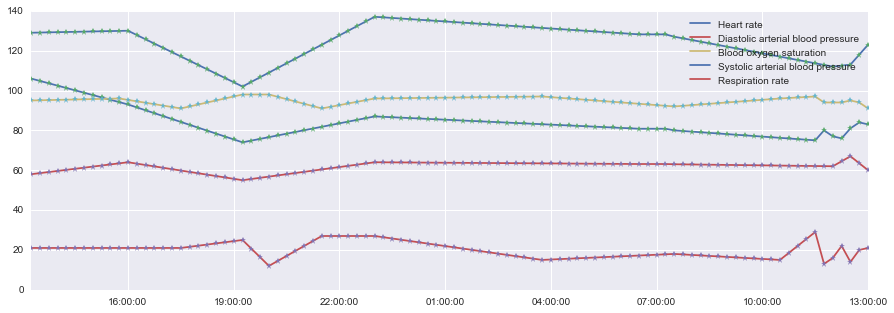

In [9]:
waves_dic = waves_u.norm_waves(df_ranges, df_case, 96)[2]
waves_u.plot_waves(waves_dic)

In [10]:
q = "select * from nda_j1_deces where HR <120 and RR<120 and SPO2<120 and ABPS<120 and ABPD<120 and \
HR >90 and RR>90 and SPO2>90 and ABPS>90 and ABPD>90"
df_mes = drill_q.drill_conn.df_from_query(q)
df_mes.head()

,id_nda,j1,HR,RR,ABPS,ABPD,SPO2,dt_deces,dt_min,dt_max,stay_len
0,2754266,2014-05-05,95.0,93.0,95.0,95.0,94.0,NaT,2014-05-05 16:44:01,2014-05-06 16:28:09,0 days 23:44:08
1,2758408,2014-05-12,105.0,104.0,105.0,105.0,100.0,2015-11-17 14:40:00,2014-05-12 19:33:00,2014-05-13 17:38:01,0 days 22:05:01
2,2791306,2014-05-11,103.0,103.0,102.0,102.0,103.0,NaT,2014-05-12 00:45:01,2014-05-12 23:38:01,0 days 22:53:00
3,2813984,2014-05-15,96.0,96.0,97.0,97.0,96.0,NaT,2014-05-15 07:05:50,2014-05-16 03:09:00,0 days 20:03:10
4,2842249,2014-05-21,104.0,105.0,99.0,99.0,99.0,2014-05-22 10:40:00,2014-05-22 03:29:11,2014-05-22 10:30:01,0 days 07:00:50


## Select all available measures for case of index=4 (~isosampling)

In [11]:
q = select_case_tpl.format('28422492014-05-21')

df_case = drill_q.drill_conn.df_from_query(q)
df_case.head()

,id_nda,j1,id_case,id_measure_type,dt_insert,value_numeric
0,2842249,2014-05-21,28422492014-05-21,10174,2014-05-22 07:01:21,36.0
1,2842249,2014-05-21,28422492014-05-21,10170,2014-05-22 07:01:21,5.0
2,2842249,2014-05-21,28422492014-05-21,10173,2014-05-22 07:01:21,7.1
3,2842249,2014-05-21,28422492014-05-21,10172,2014-05-22 07:01:21,21.0
4,2842249,2014-05-21,28422492014-05-21,10044,2014-05-22 07:01:21,80.0


## Case with about 100 points - original waves

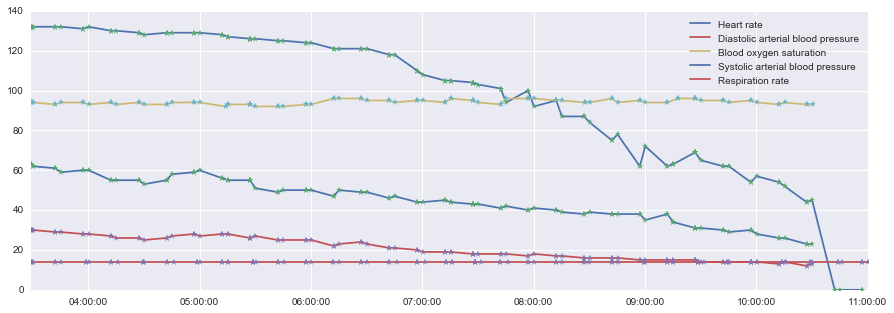

In [12]:
# Separate waves by VOI in a dictionary
waves_dic = waves_u.get_waves_from_pdf(df_case)
waves_u.plot_waves(waves_dic)

## Case with about 100 points - resampled waves

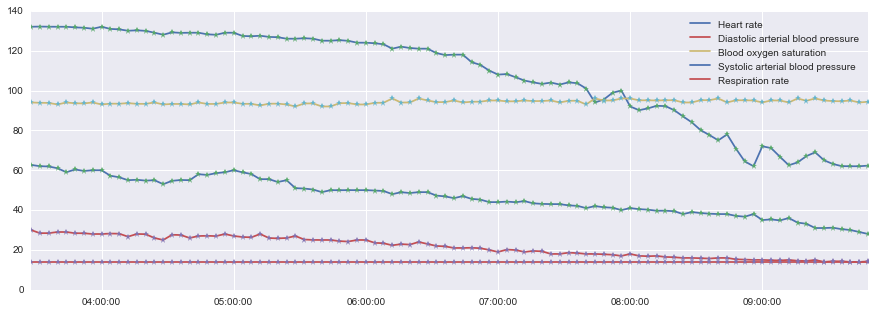

In [13]:
waves_dic = waves_u.norm_waves(df_ranges, df_case, 96, method='spline')[2]
waves_u.plot_waves(waves_dic)

In [14]:
q = "select * from nda_j1_deces where HR >200 and RR>200 and SPO2>200 and ABPS>200 and ABPD>200"
df_mes = drill_q.drill_conn.df_from_query(q)
df_mes.head()

,id_nda,j1,HR,RR,ABPS,ABPD,SPO2,dt_deces,dt_min,dt_max,stay_len
0,2773618,2014-05-06,312.0,312.0,378.0,378.0,312.0,2014-07-05 07:27:00,2014-05-06 11:02:36,2014-05-07 10:39:00,0 days 23:36:24
1,2897729,2014-06-05,216.0,216.0,514.0,514.0,216.0,2015-07-20 13:05:00,2014-06-05 17:50:10,2014-06-06 17:22:11,0 days 23:32:01
2,3154727,2014-07-15,287.0,288.0,308.0,308.0,289.0,NaT,2014-07-15 21:36:00,2014-07-16 19:24:10,0 days 21:48:10
3,3165675,2014-07-18,272.0,287.0,268.0,284.0,287.0,NaT,2014-07-18 16:15:21,2014-07-19 15:53:11,0 days 23:37:50
4,3196386,2014-07-26,202.0,202.0,202.0,202.0,202.0,NaT,2014-07-26 11:53:51,2014-07-27 09:55:10,0 days 22:01:19


## Select all available measures for case of index=2 (downsampling)

In [15]:
q = select_case_tpl.format('31963862014-07-26')
# q = select_case_tpl.format('27613822014-05-01')

df_case = drill_q.drill_conn.df_from_query(q)
df_case.head()

,id_nda,j1,id_case,id_measure_type,dt_insert,value_numeric
0,3196386,2014-07-26,31963862014-07-26,10280,2014-07-27 05:53:11,83.0
1,3196386,2014-07-26,31963862014-07-26,10294,2014-07-27 05:53:02,NaN
2,3196386,2014-07-26,31963862014-07-26,10291,2014-07-27 05:53:11,96.0
3,3196386,2014-07-26,31963862014-07-26,10285,2014-07-27 05:53:11,21.0
4,3196386,2014-07-26,31963862014-07-26,10168,2014-07-27 05:53:11,96.0


## Case with more than 200 points - original waves

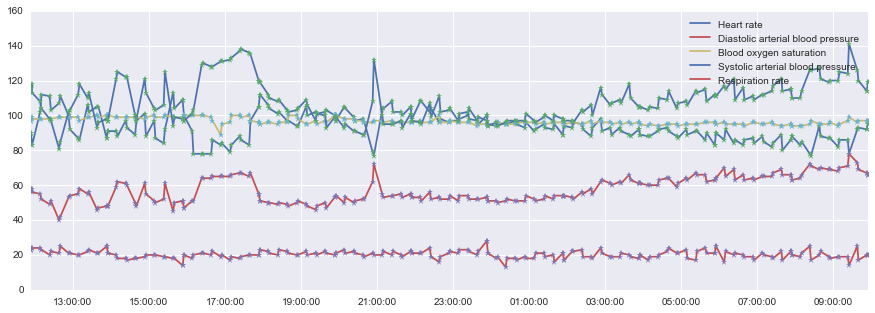

In [16]:
# Separate waves by VOI in a dictionary
waves_dic = waves_u.get_waves_from_pdf(df_case)
waves_u.plot_waves(waves_dic)

## Case with more than 200 points - resampled waves

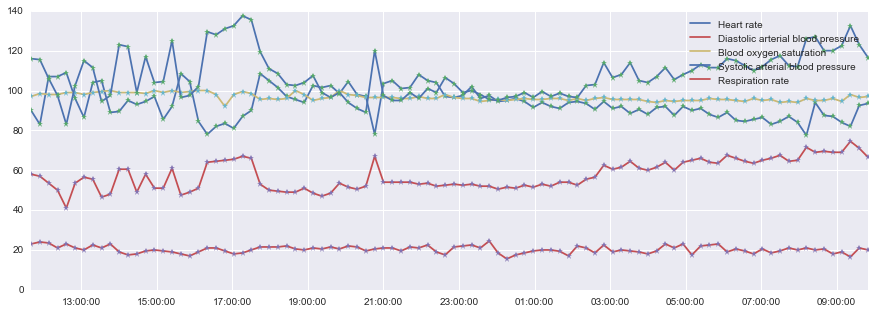

In [17]:
waves_dic = waves_u.norm_waves(df_ranges, df_case, 96, method='polynomial')[2]
waves_u.plot_waves(waves_dic)

## Create a spark context to generate the 3d pyriemann matrix (batch processing)

In [18]:
# import os
# spark_home = "C:\spark152"
# print(spark_home)
# os.environ['SPARK_HOME'] = spark_home
# os.environ['PYSPARK_DRIVER_PYTHON'] ="jupyter"
# os.environ['PYSPARK_DRIVER_PYTHON_OPTS']="notebook"
# sys.path.insert(0, os.path.join(spark_home, 'python'))
# sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.8.2.1-src.zip'))
# import spark_util as su
# sc = su.SparkClient(spark_home, exec_memory="4g")

In [19]:
# waves_u._sc = sc

In [20]:
nb_splits = 10
nb_pts = 96

from time import gmtime, strftime
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
# waves_u.build_pyriemann_input_matrix(nb_splits, nb_pts)
pr = waves_u.build_pyriemann_input_matrix_one_shot(nb_pts)
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))
pr_3d_matrix = pr[0]
tgt_vector = pr[1]

2016-10-02 20:16:10
loading rows from db...
done
1 keys processed
301 keys processed
601 keys processed
901 keys processed
1201 keys processed
1501 keys processed
1801 keys processed
2101 keys processed
2401 keys processed
2701 keys processed
2016-10-02 20:53:13


In [21]:
# sc._sc.stop()

In [23]:
import numpy as np
# Save 3D matrix in file
np.save("icu_matrix1.pyriemann", pr_3d_matrix)
np.save("icu_target1.pyriemann", tgt_vector)